In [1]:
# Good sample is either with a large grid/ multiple grids/ grinds run for a ling time
# Long term behavior

# Some discussion regarding how long it takes to reach steady state

# Plot the hysteresis curve

## PHYS 481 Assignment 4

October, 2018

Kenneth Sharman (00300185)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

### Introduction

BLAH BLAH BLAH

#### The Ising Model

The Ising model is a theoretical model of a magnet. The magnetization of a material is produced by the combination of the magnet dipoles within the material. If these magnetic dipoles are totally random, then their sum will produce a magnetization near zero. In contrast, if many of them point in the same direction, then the material will have a macroscopic non-zero magnetization.

The Ising model is a simplified model in which there are only two directions the dipoles can point; up or down. In quantum mechanics it can be shown that an electron's spin and magnetic moment (discussed below) are proportional to eachother$^1$. Thus, we refer to the dipole directions as $+1$ spin and $-1$ spin, respectively. The material is modeled by a lattice or array. We will deal with lattices in one or two dimensions, however the model can be extended to any number of dimensions. 

The individual diploes will interact with a magnetic field in such a way that it is energetically favorable for them to line up with the magnetic field. To expand on this, the concepts of dipole moment and potential energy must be discussed.

#### Magnetic Dipole Moment and its Potential Energy

Recall that the concept of the magetic dipole is easily defined when considering a loop of current. In our study of electromagnetism, the Bio-Savart law establishes that moving charges produce a magnetic field. In the case of a loop of current, a magnetic dipole is produced and we define the magnetic moment as

$$\mu = I \; A$$

Where $\mu$ is the magnetic dipole moment, $I$ is the current in loop, and $A$ is the area of the loop. We will not be considering this definition in this report, however it makes it easy to conceptualize the magnetic moment. Orbiting electrons in an atom can be viewed as a loop of current, hence every atom as a magnetic dipole moment.

The magnetic moment can be considered to be a vector quantity with direction perpendicular to the current loop (using right-hand rule). The torque is given by

$$\vec \tau = \vec{\mu} \times \vec{\text{B}} $$

Since the torque tries to line up the magnetic moment with the magnetic field, the lowest energy configuration is when $\mu$ and $\text{B}$ point in the same direction. Thus, we can express the potential energy as

$$\text{U} = - \vec{\mu} \cdot \vec{\text{B}} = -\mu \text{B} \cos{\theta} $$

Where $\theta$ represents that angle between the two vectors. Note that the minus sign is essential to ensure that the interactions are ferromagnetic; the energy is minimized when the vectors are aligned.

In the highest energy configuration, where the two vectors are pointing in opposite directions, $\text{U} = \mu \text{B}$ and in the lowest configuration (anti-aligned), $U=-\mu \text{B}$.

#### An Ising Chain
The goal of this report is to construct a two-dimensional Ising model, however we must build it up from the basics. First, we consider $N$ magnetic dipoles fixed in place in a linear chain.

Since every dipole has two possible states (spin) $S = \pm 1$, a chain of $N$ dipoles has $2^N$ possible configurations. It is easy to see that even for modest values of $N$ simply calculating the number of possible configurations becomes computationaly expensive. A discussion of statistical mechanics becomes essential to the construction of the model.

#### A Probabalistic Approach

Consider a system in thermal equilibrium with a heat-sink of temperature T, where the exact state of the system is unknown. At any particular moment the probablity of it occupying state $i$ with energy $E_i$ is given by the Boltzmann formula

$$ p_i = \frac{e^{-\beta E_i}}{Z} \qquad \text{where} \qquad Z = \sum_{i}^{N} e^{- \beta E_i} $$

The quantity $Z$ is known as the partition function. In general it is not known, and quite expensive to calculate. Before we analyze the complexity, the energy states and corresponding probablities are investigated for a one-dimensional Ising chain.

#### Question: Write a function which will calculate all of the energy states and probabilities for an arbitrary number of independent dipoles.  Tabulate the results for $N=3$, $\beta=0.1$ and $B=2$

Consider a collection of $N$ independent dipoles with state $S=\pm 1$ in an external magnetic field $B$.  The energy associated with the entire system is given by  

  $$ E = -B \sum_k S_k $$
  
This expression for the energy will allow us to calculate the probability associated with each state.

First, define a function that determines all possible spin configurations for the system$^2$.

In [3]:
from itertools import product # product function replaces iteration method below

class IsingChain:
    def __init__(self, N, B, beta):
        self.N = N
        self.B = B
        self.beta = beta
        
        self.__init__generate_all_state_data()
        
    def calc_energy(self, a_state):
        return -self.B * np.sum(a_state)
        
    def calc_all_configs(self):
        # List comprehension used in conjunction with itertools.product which is equivalent to nested for-loops
        # This one line statement iterates through all possible configurations of +/-1 repeated N times
        self.all_states = np.array([ np.array(i) for i in product([1,-1], repeat=self.N)])
    
    def calc_all_e(self):
        self.e_of_states = np.array([ -self.B * np.sum(state) for state in self.all_states])
        
    def calc_partition(self):
        self.Z = np.sum( [ np.exp(-self.beta*e) for e in self.e_of_states ] )
        
    def calc_probs(self):
        self.prob_all_states = np.array( [ np.exp(-self.beta*E) for E in self.e_of_states] ) / self.Z
        
    def randomize_state(self):
        index = np.random.choice(np.arange( len(self.all_states) ), p=self.prob_all_states)
        self.state = self.all_states[index]
        self.e = self.calc_energy(self.state)
        
    def __init__generate_all_state_data(self):
        self.calc_all_configs()
        self.calc_all_e()
        self.calc_partition()
        self.calc_probs()
        self.randomize_state()

In [4]:
ising_model = IsingChain(N=3, B=2, beta=0.1)

In [5]:
import pandas as pd

df1 = pd.DataFrame({
    'S1': [ state[0] for state in ising_model.all_states ],
    'S2': [ state[1] for state in ising_model.all_states ],
    'S3': [ state[2] for state in ising_model.all_states ],
    'Energy': ising_model.e_of_states,
    'Probabliity': ising_model.prob_all_states
})

print('Energies and Probabilities corresponding to B=2 and beta=0.1')
print(df1)
print('\nSum of Probabilities = ', np.sum(ising_model.prob_all_states))

Energies and Probabilities corresponding to B=2 and beta=0.1
   Energy  Probabliity  S1  S2  S3
0      -6     0.214586   1   1   1
1      -2     0.143841   1   1  -1
2      -2     0.143841   1  -1   1
3       2     0.096420   1  -1  -1
4      -2     0.143841  -1   1   1
5       2     0.096420  -1   1  -1
6       2     0.096420  -1  -1   1
7       6     0.064632  -1  -1  -1

Sum of Probabilities =  1.0


#### Question: Write a function which will return a Boltzmann random state for an arbitrary number $N$ of independent dipoles.  Plot the time required to produce the result as a function of $N$.  Discuss your results.

In [6]:
print( ising_model.state )

[-1  1 -1]


In [7]:
import timeit

time1 = [] # Lists for average runtimes
n_vals = np.arange(2, 20) # Range of N sizes

for n in n_vals:
    model = IsingChain(N=n, B=2, beta=0.1)
    time1.append( timeit.timeit(model.randomize_state, number=100) )

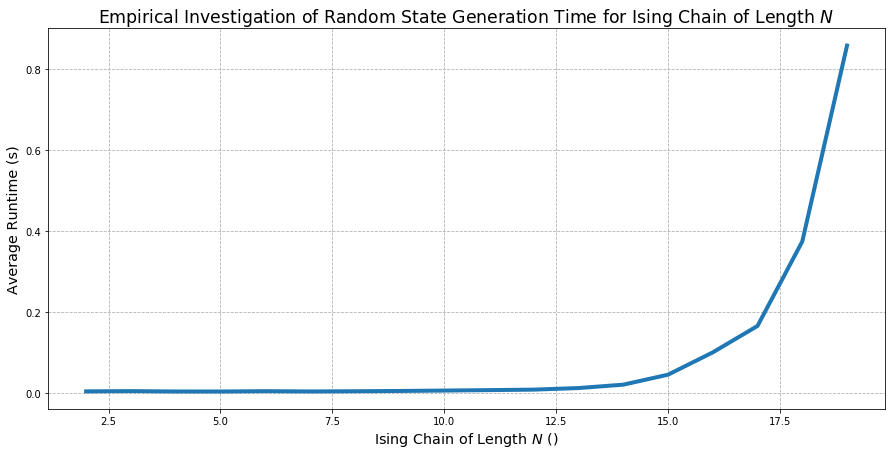

In [8]:
plt.figure(figsize=(15,7)) # Set the plot size

# Plot running times
plt.plot(n_vals, time1, linewidth=4)

# Label Plot
plt.xlabel("Ising Chain of Length $N$ ()", fontsize='x-large')
plt.ylabel("Average Runtime (s)", fontsize='x-large')
plt.title("Empirical Investigation of Random State Generation Time for Ising Chain of Length $N$", fontsize='xx-large')

plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

plt.show()

#### Question: Use the metropolis algorithm to generate a sequence of states for a single dipole with T=300K, dE=0.1, 1, 10eV.  Calculate the expected probabilities for each state and compare to the computed results for 1000 iterations.

In their simulation of neutron transmission through matter Metropolis, invented an algorithm to improve the Monte Carlo calculation of averages. This $\textit{Metropolis algorithm}$ is now a cornerstone of cmputational physics because the sequence of configurations it produces (a $\textit{Markov Chain}$) accurately simulates the fluctuations that occur during thermal equilibrium.

The algorithm randomly changes the individual spins such that, on average, the probablilty of a configuration occurring follows a Boltzmann distribution.

The Metropolis algorithm is implemented via a number of steps. We start with a fixed temperature and an initial spin configuration, and apply the algorithm until a thermal equilibrium is reached. Continued application of the alogirthm generates the statistical fluctuations about equilibrium from which we deduce the $\textit{T}$ dependence of the thermodynamic quantities.

1. Start with an arbitrary spin configuration
2. Generate a trial configuration by flipping the spin of a randomly selected particle
3. Calculate energy $E_1$ of the trial configuration
4. If $E_1\leq E_0$ accept the trial
5. If $E_1\gt E_0$ accept with relative probablilty $p=e^{-\frac{\Delta E}{T}}$

$$ E = -B \sum_k S_k $$

In [9]:
class single_dipole(IsingChain):
    
    def generate_trial_config(self):
        self.trial_state = -1 * self.state
        self.trial_e = self.calc_energy(self.trial_state)
        
    def run_metropolis(self):
        if self.trial_e <= self.e:
            self.state = self.trial_state
        else:
            #p_accept = np.minimum(1, np.exp(-self.dE * self.beta))
            p_accept = np.exp( -(self.trial_e - self.e) * self.beta )
            self.state = np.array( [ np.random.choice( [self.state[0], self.trial_state[0]], p=[1-p_accept, p_accept] ) ] )
        
        self.e = self.calc_energy(self.state)

    def get_sequence(self, N): 
        spin_list = np.array( [] )
        
        for n in range(N):
            self.generate_trial_config()
            self.run_metropolis()
            spin_list = np.append(spin_list, self.state[0])
        
        return spin_list

In [10]:
def list_stats(a_list):
    mean = np.round( np.mean(a_list), 1 )
    std = np.round( np.std(a_list), 1 )
    
    return mean, std

def single_dipole_stats(dE, iterations=1000, sample_size=10):
    list_num_aligned = np.array( [] )
    
    k = 8.6173303*10**(-5)
    T = 300
    #k = 1
    #T = 3
    
    dip = single_dipole(N=1, B=(dE/2), beta=1/(k*T))
    
    for sammple in range(sample_size):
        spin_list = dip.get_sequence(iterations)
        spins, counts = np.unique(spin_list, return_counts=True)
        
        if len(counts) <2:
            counts = np.insert(counts, 0,0)
            
        list_num_aligned = np.append(list_num_aligned, counts[1])
        
        mean, std = list_stats(list_num_aligned)
    
    return mean, std, dip.prob_all_states

        
dEs = [0.1, 1, 10]
num_iterations = 1000

stats_list = []
for dE in dEs:
    dE_stats = single_dipole_stats(dE, iterations = num_iterations)
    mean, std, boltz_prob = dE_stats[0], dE_stats[1], dE_stats[2]
    stats_list.append( (mean, std, boltz_prob[0]*num_iterations) )
    
    print('Dipole Subject to dE =', dE)
    print('\tMean Number of Aligned Poles:', mean, '\tStandard Devation:', std)
    print('\tMean Percentage of Aligned Poles', np.round( mean / num_iterations * 100.0, 2 ), '%' )
    print('\tExpected Percent Aligned from Boltzmann Probability =', np.round(boltz_prob[0] * 100.0, 2), '%\n' )

Dipole Subject to dE = 0.1
	Mean Number of Aligned Poles: 976.7 	Standard Devation: 2.9
	Mean Percentage of Aligned Poles 97.67 %
	Expected Percent Aligned from Boltzmann Probability = 97.95 %

Dipole Subject to dE = 1
	Mean Number of Aligned Poles: 1000.0 	Standard Devation: 0.0
	Mean Percentage of Aligned Poles 100.0 %
	Expected Percent Aligned from Boltzmann Probability = 100.0 %

Dipole Subject to dE = 10
	Mean Number of Aligned Poles: 1000.0 	Standard Devation: 0.0
	Mean Percentage of Aligned Poles 100.0 %
	Expected Percent Aligned from Boltzmann Probability = 100.0 %



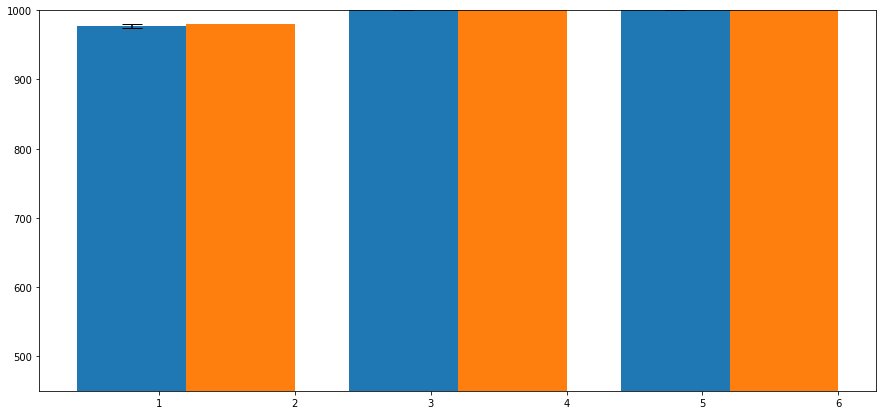

In [11]:

mean_list = [ stat[0] for stat in stats_list ]
std_list = [ stat[1] for stat in stats_list ]
boltz_list = [ stat[2] for stat in stats_list ]

plt.figure(figsize=(15,7)) # Set the plot size
ax = plt.subplot()

t = 2 # Number of datasets
d = 3 # Number of sets of bars
w = 0.8 # Width of each bar

bar1 = [t*element + w*1 for element in range(d)]
bar2 = store2_x = [t*element + w*2 for element in range(d)]

plt.bar(bar1, mean_list, yerr=std_list, capsize=10)
plt.bar(bar2, boltz_list)

ax.set_ylim([450, 1000])

plt.show()


Each dipole will generate a (small) magnetic field that may influence other dipoles.  We can explore this possibility by arranging a number of binary spins $S_k$ in a row (or a ring) and then introduce a weak coupling term

 $$ E_i = -J \,S_{i-1} S_i - J \,S_{i+1} S_k
  = -J \sum_j S_i S_j  \qquad j=i+1, i-1
 $$
that can only affect the nearest neighbors.

#### Question: Write python code to evolve a system of $N$ dipoles in a ring (wrap-around boundary conditions) using the Metropolis algorithm for arbitrary $N$, $B$, $T$, $J$.

In [12]:
test_arr = np.array( [1,] )
test_arr = np.roll( test_arr, -1 )
print(test_arr)

[1]


In [13]:
print( ising_model.state )
ising_model.randomize_state()
print( ising_model.state )

[-1  1 -1]
[ 1 -1  1]


### References
[1] - Landau R. H. (2015) $\textit{Computational Physics. Problem Solving with Python}$. Wiley-VCH. Weinheim Germany.

[2] - https://docs.python.org/2/library/itertools.html#itertools.product

In [14]:
class vehicle:
    def __init__(self, num):
        self.var = num
    def get_silly(self):
        return 'testing'

v1 = vehicle(1)
print(v1.var)

1


In [15]:
class car(vehicle):
    def set_miles(self, miles):
        self.kliks = miles
    def get_miles(self):
        return self.kliks
    
c1 = car(20)
print(c1.var)

c1.set_miles(100000)

print( c1.get_miles() )

20
100000


In [16]:
print( c1.get_silly() )

testing


In [22]:
from scipy.special import factorial


num = factorial(365)/factorial(335)

print( num )

nan


C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
